In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, Column 
from scipy.stats import linregress
from scipy import interpolate
from scipy import polyval, polyfit
from scipy.optimize import curve_fit
from scipy import odr
import pylab as py
from matplotlib import gridspec
import sklearn.datasets as ds
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import corner
import emcee
import scipy.optimize as op
from scipy.linalg import cholesky, inv,det
from scipy.optimize import minimize
import random
from astropy.table import Table, Column
from linear_mcmc import *

from redTools import *
from Kcorrect import *
from calibTools import *

In [2]:
cf3  = np.genfromtxt('cf3.csv' , delimiter='|', filling_values=-1, names=True, dtype=None, encoding=None)
pgc_cf3 = cf3['PGC']
DM_cf3  = cf3['DM']
eDM_cf3 = cf3['eDM']
N_cf3   = cf3['N']  
C_cf3   = cf3['C']  
F_cf3   = cf3['F']
I_cf3   = cf3['I']
S_cf3   = cf3['S']
H_cf3   = cf3['H']
VVmod_cf3 = cf3['Vmod']
Ks_cf3 = cf3['Ks']

In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        table
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
table = np.genfromtxt('corrected_mags_linewidth_all.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

ip  = table["pgc"]
p2  = table["P0_w2"]
p2p = table["P0_w2p"]
p1  = table["P0_w1"]
rs  = table["R_source"]



In [5]:
for i, id in enumerate(ip):
    
    if id==28120: #p1[i]!=0:
        delta = np.abs(p1[i]-p2[i])
#         if delta > 1.7:
        print id, p1[i], p2[i], p2p[i], '%.1f'%delta, rs[i]

            


28120 13.13 13.47 14.18 0.3 2


In [6]:
table = np.genfromtxt('DMs_EDD.csv.test' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)

pgc_edd = table['pgc']
logWimx   = table['logWimx']
logWimx_e = table['logWimx_e']
inc   = table['inc']
Vmod_edd   = table['Vmod']
Vls_edd   = table['Vls']

ggg = table['ggg']
rrr = table['rrr']
iii = table['iii']
zzz = table['zzz']
w11 = table['w1']
w22 = table['w2']


Sqlt = table['Sqlt']
Wqlt = table['Wqlt']

RS = table['RS']
P0 = table['P0']

I = iii-table['DMi']
W1 = w11-table['DM_w1']
g_i = ggg-iii
i_w = iii-w11

In [7]:
DMr  = table['DMr']
DMi  = table['DMi']
DMz  = table['DMz']
DM_w1  = table['DM_w1']
dDMr  = table['dDMr']
dDMi  = table['dDMi']
dDMz  = table['dDMz']
dDM_w1  = table['dDM_w1']

DMbest  = table['DM_best']
dDMbest = table['dDM_best']

logHr = np.log10(Vmod_edd) - (DMr-25)/5.  
logHi = np.log10(Vmod_edd) - (DMi-25)/5.  
logHz = np.log10(Vmod_edd) - (DMz-25)/5.  
logHw1 = np.log10(Vmod_edd) - (DM_w1-25)/5.  
logHbest = np.log10(Vmod_edd) - (DMbest-25)/5.  

# logHr = np.log10(Vls_edd) - (DMr-25)/5.  
# logHi = np.log10(Vls_edd) - (DMi-25)/5.  
# logHz = np.log10(Vls_edd) - (DMz-25)/5.  
# logHw1 = np.log10(Vls_edd) - (DM_w1-25)/5.  


dlogHr  = dDMr/5.  
dlogHi  = dDMi/5.  
dlogHz  = dDMz/5.  
dlogHw1 = dDM_w1/5. 
dlogHbest = dDMbest/5.

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero enco

In [8]:
drop = np.genfromtxt('TF_drop.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop = drop['PGC']

faint = np.genfromtxt('TF_faint.csv' , delimiter='|', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_faint = faint['PGC']

print len(pgc_drop)
print len(pgc_faint)

620
469


In [9]:
keep = pgc_edd*0.

p = 0
for i, idd in enumerate(pgc_edd):
    
    if not idd in pgc_drop and not idd in pgc_faint:
        keep[i] = 1
    else:
        p+=1

print "Total numner of dropped galaxies:", p

Total numner of dropped galaxies: 943


In [10]:
table = np.genfromtxt('Hriz_3sigClip.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop_riz = table['PGC']

table = np.genfromtxt('Hw1_3sigClip.csv' , delimiter=',', 
                        filling_values=-1, names=True, dtype=None, encoding=None)
pgc_drop_w1 = table['PGC']

print len(pgc_drop_riz)
print len(pgc_drop_w1)

##########################################################
keep_riz = pgc_edd*0.
p = 0
for i, idd in enumerate(pgc_edd):
    if not idd in pgc_drop_riz:
        keep_riz[i] = 1
    else:
        p+=1
print "Total numner of dropped riz:", p
##########################################################
keep_w1 = pgc_edd*0.
p = 0
for i, idd in enumerate(pgc_edd):
    if not idd in pgc_drop_w1:
        keep_w1[i] = 1
    else:
        p+=1
print "Total numner of dropped W1:", p
##########################################################

10
17
Total numner of dropped riz: 10
Total numner of dropped W1: 17


In [11]:
indx_op, = np.where((iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1) & (logWimx>0) & (RS>-1) & (DMr>0) & (DMi>0) & (DMz>0) & (keep_riz==1))

indx_ir, = np.where((w11>0) & (Wqlt>3) & 
                 (keep==1) & (W1<-16.1) & (DM_w1>0) & (keep_w1==1))


indx_opir, = np.where((w11>0) & (Wqlt>3) & (DM_w1>0) &
                 (keep==1) & (W1<-16.1) & (DM_w1>0) & (iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (logWimx>0) & (RS>-1) & (DMr>0) & (DMi>0) & (DMz>0) & (keep_w1==1)  
                    & (keep_riz==1))


indx_best, = np.where(((w11>0) & (Wqlt>3)& (W1<-16.1) & (DM_w1>0) & (keep_w1==1) & (keep==1)) | 
                 ((iii>0) & (I<-17) & (zzz>0)  & (rrr>0)
                 & (Sqlt>3) & (keep==1) & (logWimx>0) & (RS>-1) 
                 & (DMr>0) & (DMi>0) & (DMz>0) & (keep_riz==1)))


font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()
/home/ehsan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


In [12]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)

In [13]:
def myHubble(D, H0):
    return H0    


def plotHubble(ax, X, Y, Ye, indx, band=""):
    
    X  = X[indx]
    Y  = Y[indx]
    Ye = Ye[indx]    
    
    
    ax.plot(X, 10**Y, 'k.', alpha=0.1, mec='white', ms=5)
    
    

    
    for i in np.arange(0,18000, 1000):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1000 and Y[ii]>-10000: #and Ye[ii]>0:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>0:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
#             yy = np.sum(yp/ype**2)/np.sum(1./ype**2)
            yy = np.mean(yp)
            
            fit, cov = curve_fit(myHubble, xp, yp, sigma=ype)
            yy = fit[0]
            H0e_fit = 10**yy*np.log(10.)*np.sqrt(cov[0])
    
#             10**yy*np.log(10.)*np.sqrt(np.sum(ype**2))/len(xp)
            if np.median(xp)>4000:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color='r', ms=5, capsize=2)     
            else:
                ax.errorbar(i+500, 10**yy, yerr=H0e_fit, xerr=np.std(xp), fmt='o', 
                        color='r', ms=5, mfc='white', capsize=2)  
            
#             if band=='i' or band=='W1':
#                 print band, np.median(xp), 10**yy
#     m = np.median(Y[X>4000])
#     m = (np.sum(Y[X>4000]/Ye[X>4000])/np.sum(1./Ye[X>4000]))


    fit, cov = curve_fit(myHubble, X[X>4000], Y[X>4000], sigma=Ye[X>4000])
    m = fit[0]
    H0e_fit = 10**m*np.log(10.)*np.sqrt(cov[0])

    # H_rms = np.sqrt(np.sum((10**Y-H0_fit)**2)/(len(X)))

    H0 = 10**m
    print  H0

    ax.plot([4000,20000], [H0, H0], '--', color='blue')


    x_ax, y_ax = set_axes(ax, (0,20000), (35,150), fontsize=14) 

    ax.set_yscale('log')

    from matplotlib.ticker import MultipleLocator

    from matplotlib.ticker import NullFormatter
    
    ax.set_yticks(np.arange(30,150, step=30))
    ax.yaxis.set_major_formatter(NullFormatter())  
    ax.yaxis.set_minor_formatter(NullFormatter())

    ax.yaxis.set_major_locator(MultipleLocator(30))
    ax.yaxis.set_minor_locator(MultipleLocator(10))

    plt.yticks([40, 70, 100, 130], ('40', '70', '100','130'))
    # ax.set_yticks(np.arange(50,140, step=10))



    y_ax.set_yticks(np.arange(30,150, step=30))
    y_ax.set_yscale('log')
    y_ax.yaxis.set_major_formatter(NullFormatter())  
    y_ax.yaxis.set_minor_formatter(NullFormatter())
    y_ax.yaxis.set_major_locator(MultipleLocator(30))
    y_ax.yaxis.set_minor_locator(MultipleLocator(10))


    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.80*Xlm[0]+0.20*Xlm[1]
    y0 = 0.95*Ylm[0]+0.05*Ylm[1] 
    # y1 = 0.2*Ylm[0]+0.8*Ylm[1] 
    unit= '   km/s/Mpc'
    ax.text(x0,y0, r"$ \langle H_0 \rangle_{"+band+"}= $"+"%.1f" % H0+'$\pm$'+"%.1f" % H0e_fit+unit, fontsize=14, 
            color='blue', backgroundcolor='white')
    # ax.text(x0,y1, r"$rms = $"+"%.1f" % H_rms+unit,fontsize=12, color='k')

    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))

    ax.errorbar(19000, 45, yerr=55*np.log(10.)*np.median(Ye), fmt='o', 
                        color='g', ms=6, mfc='white', capsize=2) 

/home/ehsan/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


77.39746680240498
75.61964586822182


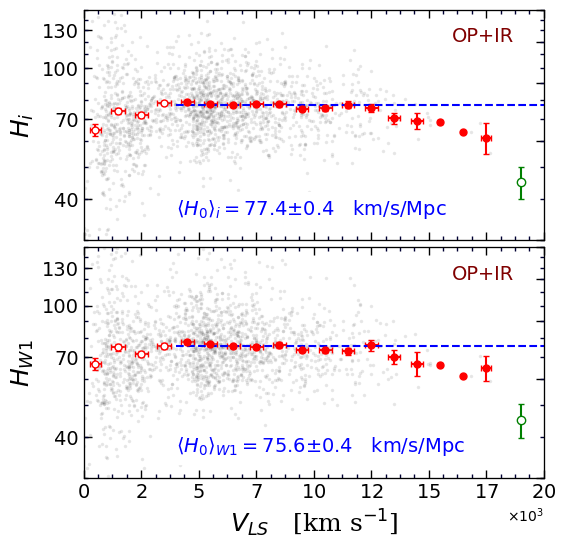

In [14]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

X  = Vls_edd
####################################################
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHi
Ye = dlogHi
plotHubble(ax, X, Y, Ye, indx_opir, band="i")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{i}$', fontsize=18, fontdict=font) 
ax.text(16000, 120, "OP+IR", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHw1
Ye = dlogHw1
plotHubble(ax, X, Y, Ye, indx_opir, band="W1")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{W1}$', fontsize=18, fontdict=font) 

ax.set_xlabel(r'$V_{LS} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 

ax.text(16000, 120, "OP+IR", fontsize=14, color='maroon')

# ax.plot([4000,20000], [74.8, 74.8], '--', color='red')

plt.subplots_adjust(hspace=0.03, wspace=0.2)

75.08527241596857


Text(0.5,0,'$V_{LS} $   [km s$^{-1}$]')

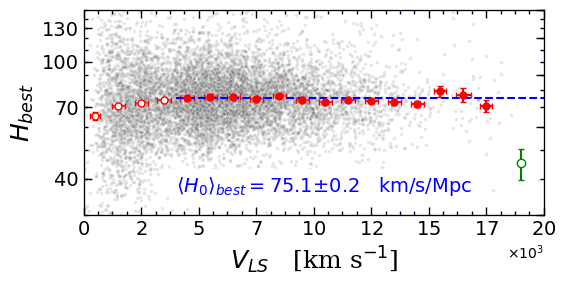

In [15]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

X  = Vls_edd
####################################################
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHbest
Ye = dlogHbest
plotHubble(ax, X, Y, Ye, indx_best, band="best")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{best}$', fontsize=18, fontdict=font) 
# ax.text(16000, 120, "All", fontsize=14, color='maroon')

ax.set_xlabel(r'$V_{LS} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 

74.7920882902628
74.80935477576266
74.81274031374318
75.89315680386929


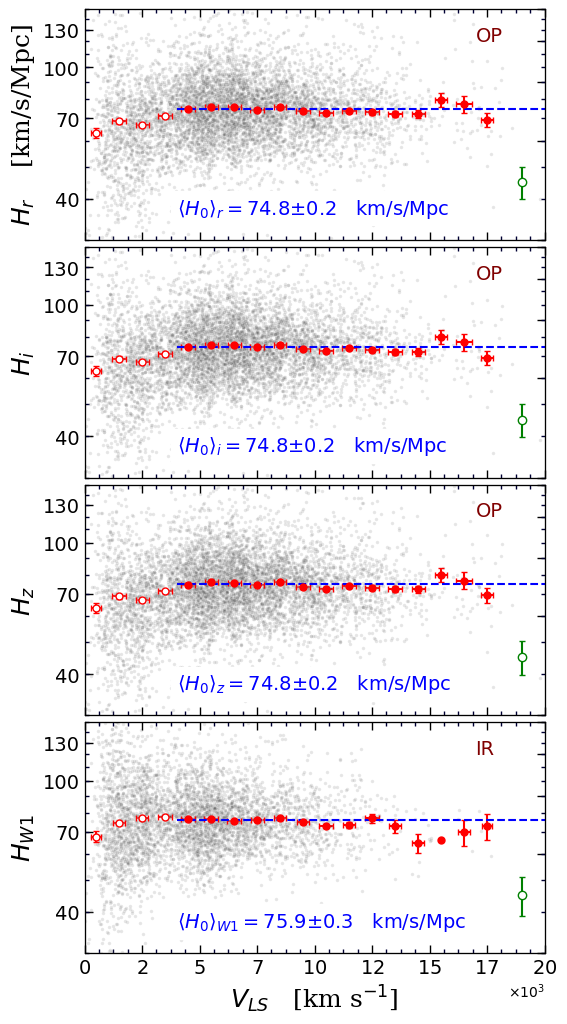

In [16]:
fig = py.figure(figsize=(5, 11.8), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(4,1) ; p=0

X  = Vls_edd
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHr
Ye = dlogHr
plotHubble(ax, X, Y, Ye, indx_op, band="r")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{r}$'+'    [km/s/Mpc]', fontsize=18, fontdict=font) 
ax.text(17000, 120, "OP", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHi
Ye = dlogHi
plotHubble(ax, X, Y, Ye, indx_op, band="i")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{i}$', fontsize=18, fontdict=font) 
ax.text(17000, 120, "OP", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHz
Ye = dlogHz
plotHubble(ax, X, Y, Ye, indx_op, band="z")
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{z}$', fontsize=18, fontdict=font) 
ax.text(17000, 120, "OP", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y  = logHw1
Ye = dlogHw1
plotHubble(ax, X, Y, Ye, indx_ir, band="W1")
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$H_{W1}$', fontsize=18, fontdict=font) 
ax.text(17000, 120, "IR", fontsize=14, color='maroon')

ax.set_xlabel(r'$V_{LS} $'+'   [km s'+r'$^{-1}$'+']', fontsize=18, fontdict=font) 

plt.subplots_adjust(hspace=0.03, wspace=0.2)

In [17]:
def plotDM(ax, X, DM, dDM, indx):

    X  = X[indx]
    Y  = DM[indx]
    Ye = dDM[indx]
    
    ax.plot(X, Y, 'k.', alpha=0.05, mec='white', ms=7)
    
#     indx, = np.where(np.abs(Y)<0.4)
#     X  = X[indx]
#     Y  = Y[indx]
#     Ye = Ye[indx]    


    for i in np.arange(0,18000, 1000):
        xp = []
        yp = []
        ype  = []
        for ii in range(len(X)):
            xi = X[ii]
            if xi>=i and xi<i+1000:
                xp.append(xi)
                yp.append(Y[ii])
                ype.append(Ye[ii])
        if len(xp)>0:
            yp = np.asarray(yp)
            ype = np.asarray(ype)
            yy = np.mean(yp) # np.sum(yp/ype**2)/np.sum(1./ype**2)
            
#             np.std(yp)/np.sqrt(len(xp))
#             fit, cov = curve_fit(myHubble, xp, yp, sigma=ype)
#             yy = fit[0]
#             H0e_fit = np.sqrt(cov[0]) #
            
            ax.errorbar(i+500, yy, yerr=np.sqrt(np.sum(ype**2))/len(xp), xerr=np.std(xp), fmt='o', 
                        color='r', ms=6)     

    
    x_ax, y_ax = set_axes(ax, (0,20000), (-0.45,0.45), fontsize=11) 
    
    ax.plot([0, 20000], [0,0], '--', color='navy')
    ax.xaxis.set_major_formatter(OOMFormatter(3, "%d"))
    ax.ticklabel_format(axis='x', style='sci', scilimits=(3,3))
    
    fit, cov = curve_fit(myHubble, X, Y, sigma=Ye)
    print np.mean(Y), fit[0]
    
    Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
    x0 = 0.5*Xlm[0]+0.5*Xlm[1]
    y0 = 0.9*Ylm[0]+0.10*Ylm[1]
        
    RMS = np.sqrt(np.mean(Y**2))
    ax.text(x0,y0, r"$RMS$" +": %.2f [mag]" % RMS, fontsize=12, color='purple') 

-0.0014734115495962184 -3.228406630007008e-05
-0.0009964955051044145 -2.579416902337428e-05
0.0029983965793693268 0.03631773235860303


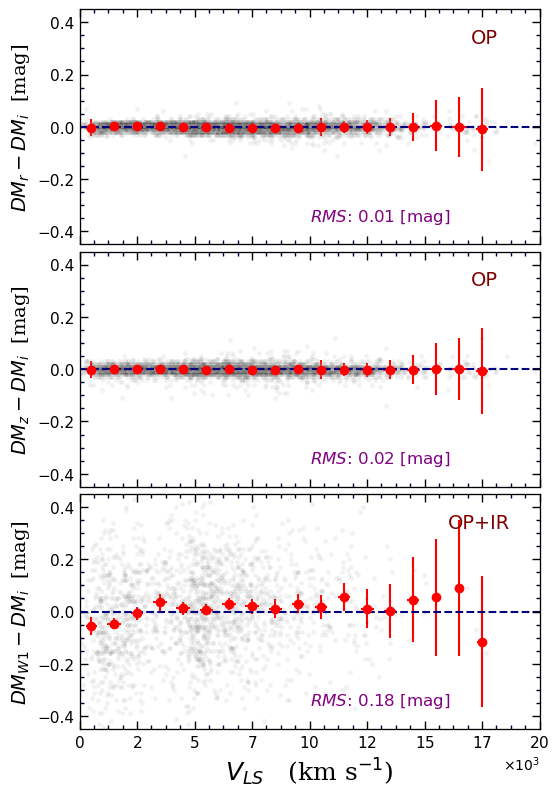

In [18]:
fig = py.figure(figsize=(5, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

X  = Vls_edd
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DMr-DMi
Ye = np.sqrt(dDMr**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_op)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_r-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 
ax.text(17000, 0.32, "OP", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DMz-DMi
Ye = np.sqrt(dDMz**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_op)
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_z-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 
ax.text(17000, 0.32, "OP", fontsize=14, color='maroon')
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DM_w1-DMi
Ye = np.sqrt(dDM_w1**2+dDMi**2)
plotDM(ax, X, Y, Ye, indx_opir)
# plt.setp(ax.get_xticklabels(), visible=False)
ax.set_ylabel(r'$DM_{W1}-DM_i$'+'  [mag]', fontsize=14, fontdict=font) 
ax.text(16000, 0.32, "OP+IR", fontsize=14, color='maroon')

ax.set_xlabel(r'$V_{LS} $'+'   (km s'+r'$^{-1}$'+')', fontsize=18, fontdict=font) 

plt.subplots_adjust(hspace=0.03, wspace=0.2)

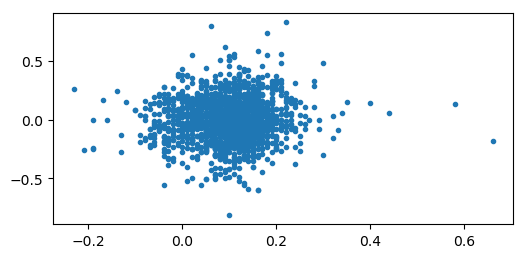

In [19]:
fig = py.figure(figsize=(5, 9), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(3,1) ; p=0

X  = iii-zzz
####################################################
ax = plt.subplot(gs[p]) ; p+=1
Y = DMi-DM_w1

ax.plot(X[indx_opir], Y[indx_opir], '.')


